# Using drawdata to create your custom toy dataset for learning purposes

In [ ]:
%pip install drawdata

In [89]:
from drawdata import ScatterWidget

In [90]:
widget = ScatterWidget()

In [91]:
widget

ScatterWidget()

In [92]:
df = widget.data_as_pandas
df

,x,y,color,label
0,547.261883,445.409900,#1f77b4,a
1,557.207922,419.428276,#1f77b4,a
2,546.041584,425.467930,#1f77b4,a
3,534.791694,420.385496,#1f77b4,a
4,540.986105,445.519074,#1f77b4,a
...,...,...,...,...
549,391.612247,238.696475,#2ca02c,c
550,383.852584,255.309802,#2ca02c,c
551,400.457364,251.161371,#2ca02c,c
552,378.833651,245.950869,#2ca02c,c


In [ ]:
%pip install matplotlib pandas numpy sickit-learn

In [95]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

In [96]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Prepare data
X = df[['x', 'y']].values
y = LabelEncoder().fit_transform(df['label'])

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
    'Linear Support Vector Classifier': LinearSVC(),
    'Support Vector Classifier with RBF Kernel': SVC(kernel='rbf'),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier()
}

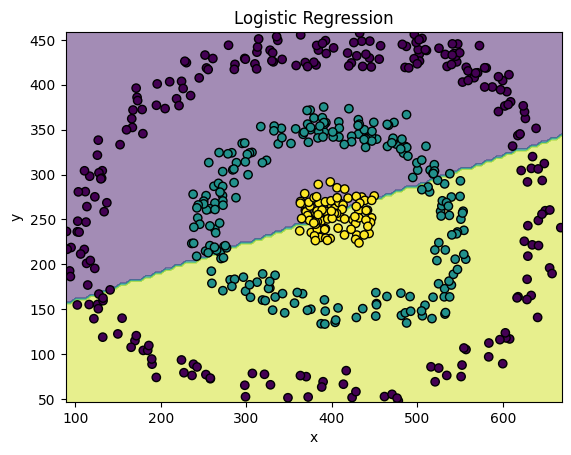

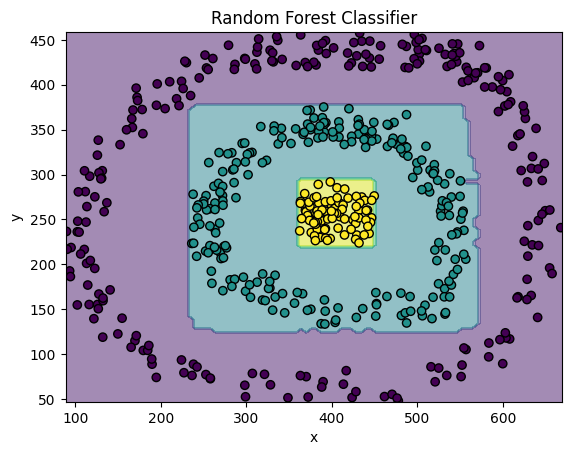

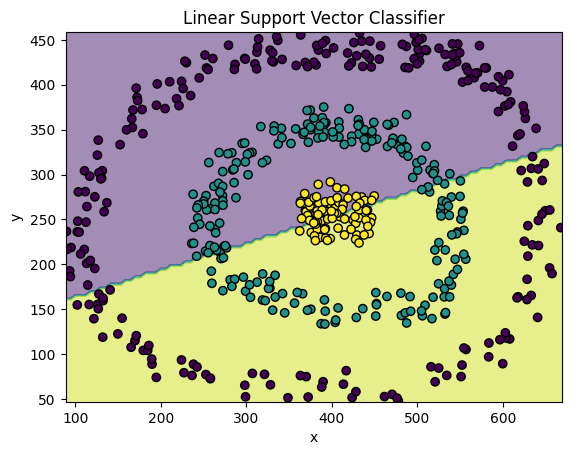

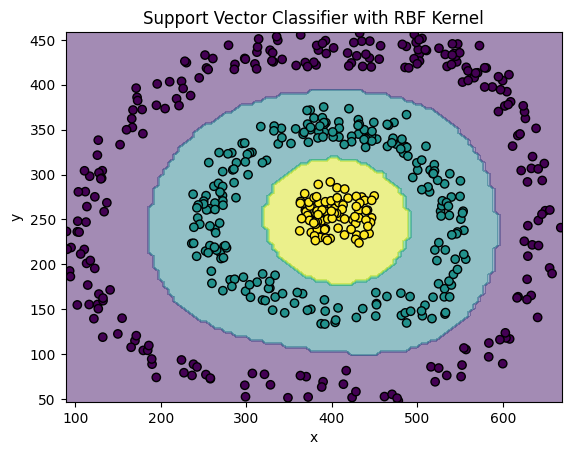

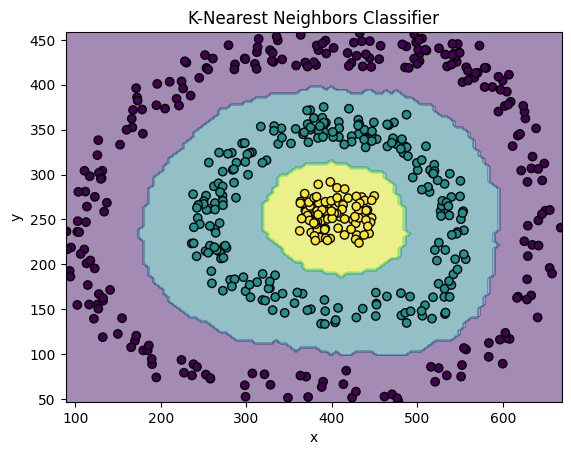

In [97]:
# Plot decision boundaries
for name, classifier in classifiers.items():
    classifier.fit(X, y)
    display = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        response_method='predict',
        xlabel='x',
        ylabel='y',
        alpha=0.5
    )
    
    display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    display.ax_.set_title(name)
    plt.show()

# Creating Interactive Environment

In [98]:
import warnings
import ipywidgets as widgets
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [99]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
# Initialize widgets
widget3 = ScatterWidget()
output = widgets.Output()

In [101]:
# Define classifiers mapping
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC Poly': SVC(kernel='poly'),
    'SVC RBF': SVC(kernel='rbf')
}

classifier_selector = widgets.RadioButtons(
    options=list(classifiers.keys()),
    description='Classifier:'
)

@output.capture(clear_output=True)
def on_change(change):
    df = widget3.data_as_pandas
    if len(df) and df['color'].nunique() > 1:
        X = df[['x', 'y']].values
        y = df['color']

        classifier = classifiers[classifier_selector.value].fit(X, y)
        
        DecisionBoundaryDisplay.from_estimator(
            classifier, X,
            response_method="predict",
            xlabel="x", ylabel="y",
            alpha=0.5
        ).ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        plt.title(classifier.__class__.__name__)
        plt.show()

In [102]:
# Set up observers and initial display
widget3.observe(on_change, names=["data"])
classifier_selector.observe(on_change, names="value")
on_change(None)

widgets.HBox([widgets.VBox([widget3, classifier_selector]), output])